In [ ]:
#loading in the datasets

#mounting google drive
from google.colab import drive
import os
#creating directory
DRIVE_DB_DIR = '/content/drive/MyDrive/Colab_Data'
drive.mount('/content/drive')
if not os.path.exists(DRIVE_DB_DIR):
    os.makedirs(DRIVE_DB_DIR)

#imports
import sqlite3
import pandas as pd
from pathlib import Path
from IPython.display import display

#uploading csvs
from google.colab import files
print("Please upload both 'McDonalds_financial_statements.csv' and 'Mcdonalds.csv' now.")
uploaded = files.upload()

#loading in files
CSV_FILE_1 = "McDonalds_financial_statements.csv"
CSV_FILE_2 = "Mcdonalds.csv"
CSV_FILE_3 = "BigmacPrice.csv"

#path for the new SQLite db
DB_PATH = os.path.join(DRIVE_DB_DIR, 'mcdonalds_finance.db')

#connecting to SQLite Database
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

#sql execution
def run_sql(sql, params=None, show=True):
    """Run a SQL command (or multiple commands) and optionally show results as a DataFrame."""
    if params is None:
        params = ()
    try:
        if ";" in sql.strip():
             cursor.executescript(sql)
        else:
             cursor.execute(sql, params)
        conn.commit()

        if show and sql.lstrip().lower().startswith("select"):
            rows = cursor.fetchall()
            cols = [desc[0] for desc in cursor.description]
            display(pd.DataFrame(rows, columns=cols))
    except Exception as e:
        print("Error:", e)

#csv1 : McDonalds_financial_statements.csv
if CSV_FILE_1 in uploaded:
    #csv into a pandas df
    df1 = pd.read_csv(CSV_FILE_1)
    #load df into SQLite table
    df1.to_sql('mcdonalds_financial_statements', conn, if_exists='replace', index=False)
    print(f"'{CSV_FILE_1}' successfully loaded into table 'mcdonalds_financial_statements'.")
else:
    print(f"Error: Could not find '{CSV_FILE_1}' in the uploaded files. Skipping table creation.")

#csv 2: Mcdonalds.csv
if CSV_FILE_2 in uploaded:
    #read second csv file into Pandas DataFrame
    df2 = pd.read_csv(CSV_FILE_2)
    #df into new SQLite table
    df2.to_sql('mcdonalds_metadata', conn, if_exists='replace', index=False)
    print(f"'{CSV_FILE_2}' successfully loaded into table 'mcdonalds_metadata'.")
else:
    print(f"Error: Could not find '{CSV_FILE_2}' in the uploaded files. Skipping table creation.")

#csv 3: BigmacPrice
if CSV_FILE_3 in uploaded:
    #read third csv file into Pandas DataFrame
    df3 = pd.read_csv(CSV_FILE_3)
    #df into new SQLite table
    df3.to_sql('bigmac_prices', conn, if_exists='replace', index=False)
    print(f"'{CSV_FILE_3}' successfully loaded into table 'bigmac_prices'.")
else:
    print(f"Error: Could not find '{CSV_FILE_3}' in the uploaded files. Skipping table creation.")

#testing connections
print("\n--- Testing SQL Queries ---")

if CSV_FILE_1 in uploaded:
    print("Top 5 rows of 'mcdonalds_financial_statements':")
    run_sql("SELECT * FROM mcdonalds_financial_statements LIMIT 5")

if CSV_FILE_2 in uploaded:
    print("Top 5 rows of 'mcdonalds_metadata':")
    run_sql("SELECT * FROM mcdonalds_metadata LIMIT 5")

if CSV_FILE_3 in uploaded:
    print("Top 5 rows of 'bigmac_prices':")
    run_sql("SELECT * FROM bigmac_prices LIMIT 5")

#the og print statement, updated to show the correct DB path
print("\nConnected to Database:", Path(DB_PATH).resolve())

#conn.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Please upload both 'McDonalds_financial_statements.csv' and 'Mcdonalds.csv' now.


Saving BigmacPrice.csv to BigmacPrice.csv
Saving McDonalds_financial_statements.csv to McDonalds_financial_statements.csv
Saving Mcdonalds.csv to Mcdonalds.csv
'McDonalds_financial_statements.csv' successfully loaded into table 'mcdonalds_financial_statements'.
'Mcdonalds.csv' successfully loaded into table 'mcdonalds_metadata'.
'BigmacPrice.csv' successfully loaded into table 'bigmac_prices'.

--- Testing SQL Queries ---
Top 5 rows of 'mcdonalds_financial_statements':


,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.2,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.5,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.4,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.0,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.8,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06


Top 5 rows of 'mcdonalds_metadata':


,Fiscal Year / Year,McDonald's Revenue,Growth Rate,Q1,Q2,Q3,Q4
0,1999,$13.3B,None,None,None,None,None
1,2000,$14.2B,7%?,None,None,None,None
2,2001,$14.9B,4%?,None,None,None,None
3,2002,$15.4B,4%?,None,None,None,$3.0B
4,2003,$17.1B,11%?,$3.8B,$4.3B,$4.5B,$4.6B


Top 5 rows of 'bigmac_prices':


,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85



Connected to Database: /content/drive/MyDrive/Colab_Data/mcdonalds_finance.db


In [ ]:
#creating bigmac_prices
sql_delete_table = """
DROP TABLE IF EXISTS new_bigmac;
"""
run_sql(sql_delete_table, show = False)


sql_create_table_query = """
CREATE TABLE IF NOT EXISTS new_bigmac AS

SELECT
    CAST(SUBSTR(date, 1, 4) AS INTEGER) AS year,
    AVG(local_price) AS avg_local_price,
    AVG(dollar_ex) AS avg_dollar_ex,
    AVG(dollar_price) AS avg_dollar_price
FROM
    bigmac_prices
WHERE
    name = 'United States'
GROUP BY
    year
ORDER BY
    year DESC;
"""

run_sql(sql_create_table_query, show = False)


sql_new_bigmac_query = """
SELECT
    *
FROM
    new_bigmac
"""
#display
run_sql(sql_new_bigmac_query)

,year,avg_local_price,avg_dollar_ex,avg_dollar_price
0,2022,5.095,1.0,5.095
1,2021,4.910,1.0,4.910
2,2020,4.820,1.0,4.820
3,2019,4.710,1.0,4.710
4,2018,4.615,1.0,4.615
5,2017,4.500,1.0,4.500
6,2016,4.395,1.0,4.395
7,2015,4.290,1.0,4.290
8,2014,4.265,1.0,4.265
9,2013,4.105,1.0,4.105


In [ ]:
#merging all datasets
sql_delete_merge_table = """
DROP TABLE IF EXISTS merged_table;
"""
run_sql(sql_delete_merge_table, show = False)


sql_create_merge_table_query = """
CREATE TABLE IF NOT EXISTS merged_table AS

SELECT
    fin.Year,
    fin."Market cap ($B)",
    fin."Revenue ($B)",
    fin."Earnings ($B)",
    fin."P/E ratio",
    fin."P/S ratio",
    fin."P/B ratio",
    fin."Operating Margin (%)",
    fin."EPS ($)",
    fin."Shares Outstanding ($B)",
    fin."Cash on Hand ($B)",
    fin."Dividend Yield (%)",
    fin."Dividend (stock split adjusted) ($)",
    fin."Net assets ($B)",
    fin."Total assets ($B)",
    fin."Total debt ($B)",
    fin."Total liabilities ($B)",

    --mcd."McDonald's Revenue",
    --standardizing McDonald's Rev
    CAST(
        REPLACE(
            REPLACE(
                mcd."McDonald's Revenue",
                '$', '' --removing dollar sign
            ),
            'B', '' --removing
        )
        AS REAL
    ) AS "McDonald's Revenue ($B)", --renamed

    ---mcd."Growth Rate",
    --cleaning growth rate
    CAST(
        REPLACE(
            REPLACE(
                mcd."Growth Rate",
                '?', '' -- replacing '?' with an empty string
            ),
            '%', '' -- replacing '%' with an empty string
        )
        AS REAL
    ) AS "Growth Rate",


    --formatting quarterly vals
    --mcd.Q1,
    --mcd.Q2,
    --mcd.Q3,
    --mcd.Q4,
    CAST(
        REPLACE(
            REPLACE(
                mcd.Q1,
                '$', '' --removing dollar sign
            ),
            'B', '' --removing'B'
        )
        AS REAL
    ) AS "Q1 ($B)", --renaming

    CAST(
        REPLACE(
            REPLACE(
                mcd.Q2,
                '$', ''
            ),
            'B', ''
        )
        AS REAL
    ) AS "Q2 ($B)",

    CAST(
        REPLACE(
            REPLACE(
                mcd.Q3,
                '$', ''
            ),
            'B', ''
        )
        AS REAL
    ) AS "Q3 ($B)",

    CAST(
        REPLACE(
            REPLACE(
                mcd.Q4,
                '$', ''
            ),
            'B', ''
        )
        AS REAL
    ) AS "Q4 ($B)",

    big.avg_local_price,
    big.avg_dollar_ex,
    big.avg_dollar_price
FROM
    mcdonalds_financial_statements AS fin
LEFT JOIN
    mcdonalds_metadata AS mcd
    ON fin.Year = mcd."Fiscal Year / Year"
LEFT JOIN
    new_bigmac AS big
    ON fin.Year = big.year
WHERE
    fin.Year != 2002 -- cleaning; got rid of 2002 because there's no quarterly info
"""

run_sql(sql_create_merge_table_query, show = False)

sql_merged_table = """
SELECT
    *
FROM
    merged_table
"""
#display
run_sql(sql_merged_table)

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),...,Total liabilities ($B),McDonald's Revenue ($B),Growth Rate,Q1 ($B),Q2 ($B),Q3 ($B),Q4 ($B),avg_local_price,avg_dollar_ex,avg_dollar_price
0,2022,193.01,23.18,7.82,31.3,8.33,-32.20,33.76,8.42,0.73,...,56.43,23.2,0.0,5.7,5.7,5.9,5.9,5.095,1.0,5.095
1,2021,200.31,23.22,9.12,26.5,8.63,-43.50,39.31,10.11,0.74,...,58.20,23.2,21.0,5.1,5.9,6.2,6.0,4.910,1.0,4.910
2,2020,159.88,19.20,6.14,33.8,8.32,-20.40,31.97,6.35,0.74,...,60.45,19.2,-10.0,4.7,3.8,5.4,5.3,4.820,1.0,4.820
3,2019,147.47,21.28,8.01,24.8,6.93,-18.00,38.04,7.98,0.74,...,55.72,21.4,1.0,5.0,5.3,5.6,5.4,4.710,1.0,4.710
4,2018,136.21,21.02,7.81,23.2,6.48,-21.80,37.17,7.65,0.76,...,39.06,21.3,-7.0,5.1,5.4,5.4,5.4,4.615,1.0,4.615
5,2017,137.21,22.82,8.57,26.7,6.01,-42.00,37.57,6.46,0.79,...,37.07,22.8,-7.0,5.7,6.0,5.8,5.3,4.500,1.0,4.500
6,2016,101.08,24.62,6.86,22.0,4.11,-45.90,27.89,5.53,0.81,...,33.22,24.6,-3.0,5.9,6.3,6.4,6.0,4.395,1.0,4.395
7,2015,107.12,25.41,6.55,24.2,4.22,15.10,25.80,4.88,0.90,...,30.85,25.4,-7.0,6.0,6.5,6.6,6.3,4.290,1.0,4.290
8,2014,90.22,27.44,7.37,19.2,3.29,7.02,26.86,4.87,0.96,...,21.42,27.4,-2.0,6.7,7.2,7.0,6.6,4.265,1.0,4.265
9,2013,96.09,28.10,8.20,17.3,3.42,6.00,29.19,5.60,0.99,...,20.61,28.1,2.0,6.6,7.1,7.3,7.1,4.105,1.0,4.105


In [ ]:
#exporting table

#getting merged table
sql_export_query = sql_merged_table

#read merged SQL table into df
df_merged = pd.read_sql_query(sql_export_query, conn)

#output path
data_folder = Path("data") # Creates a folder named 'data' in the Colab instance

#create the directory if it doesn't exist
data_folder.mkdir(exist_ok = True)

#final path and filename for  CSV
output_file_path = data_folder / "mcdonalds_financial_analysis.csv"

#save df to a CSV file
df_merged.to_csv(output_file_path, index = False)

#download it
from google.colab import files
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = df_merged

#basic pre-processing and sorting for time-series operations
df = df.sort_values(by='Year').reset_index(drop=True)
print("DataFrame loaded and sorted.")
display(df.head())

conn.close() #close the connection when done with DB operations

DataFrame loaded and sorted.


,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),...,Total liabilities ($B),McDonald's Revenue ($B),Growth Rate,Q1 ($B),Q2 ($B),Q3 ($B),Q4 ($B),avg_local_price,avg_dollar_ex,avg_dollar_price
0,2003,31.33,17.14,2.34,21.4,1.83,2.62,13.69,1.16,1.27,...,13.54,17.1,11.0,3.8,4.3,4.5,4.6,2.460,1.0,2.460
1,2004,40.71,19.06,3.20,17.6,2.14,2.87,16.80,1.82,1.25,...,13.63,18.6,8.0,4.4,4.7,4.9,4.5,2.470,1.0,2.470
2,2005,42.59,20.46,3.70,16.4,2.08,2.81,18.09,2.06,1.25,...,14.84,19.1,3.0,4.8,5.1,5.3,3.9,2.580,1.0,2.580
3,2006,53.36,20.81,3.88,15.4,2.56,3.45,19.30,2.88,1.23,...,13.56,20.9,9.0,4.9,5.4,5.5,5.1,2.725,1.0,2.725
4,2007,67.84,22.78,3.57,29.3,2.98,4.44,15.68,2.01,1.18,...,14.11,22.8,9.0,5.3,5.8,5.9,5.8,2.945,1.0,2.945


In [ ]:
quarterly_cols = ['Q1 ($B)', 'Q2 ($B)', 'Q3 ($B)', 'Q4 ($B)']
id_vars = [col for col in df.columns if col not in quarterly_cols]

df_long = pd.melt(df,
                  id_vars=id_vars,
                  value_vars=quarterly_cols,
                  var_name='Quarter_Str',
                  value_name='Quarterly_Revenue_Target')

df_long['Quarter'] = (
    df_long['Quarter_Str']
    .str.replace(r'[^0-9]', '', regex=True)
    .astype(int)
)

df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + (df_long['Quarter'] * 3).astype(str) + '-01')

df_long = df_long.sort_values(by='Date').dropna(subset=['Quarterly_Revenue_Target']).reset_index(drop=True)

print("\nLong-format DataFrame ready for time-series features:")
display(df_long[['Date', 'Year', 'Quarter', 'Quarterly_Revenue_Target', 'avg_dollar_price']].tail())


Long-format DataFrame ready for time-series features:


,Date,Year,Quarter,Quarterly_Revenue_Target,avg_dollar_price
75,2021-12-01,2021,4,6.0,4.910
76,2022-03-01,2022,1,5.7,5.095
77,2022-06-01,2022,2,5.7,5.095
78,2022-09-01,2022,3,5.9,5.095
79,2022-12-01,2022,4,5.9,5.095


In [ ]:
df_ts = df_long.set_index('Date')

df_ts['Revenue_Lag_1Q'] = df_ts['Quarterly_Revenue_Target'].shift(1)
df_ts['Revenue_Lag_4Q'] = df_ts['Quarterly_Revenue_Target'].shift(4)

df_ts['BigMacPrice_Vol_4Q'] = df_ts['avg_dollar_price'].rolling(window=4).std()

df_ts['EPS_Rolling_Avg_4Q'] = df_ts['EPS ($)'].rolling(window=4).mean()

df_ts['Quarter_Feature'] = df_ts['Quarter']
df_ts['Year_Feature'] = df_ts['Year']

print("\nDataFrame with engineered features:")
display(df_ts[['Quarterly_Revenue_Target', 'Revenue_Lag_1Q', 'Revenue_Lag_4Q', 'BigMacPrice_Vol_4Q', 'EPS_Rolling_Avg_4Q']].tail())

df_final = df_ts.dropna().reset_index()


DataFrame with engineered features:


,Quarterly_Revenue_Target,Revenue_Lag_1Q,Revenue_Lag_4Q,BigMacPrice_Vol_4Q,EPS_Rolling_Avg_4Q
Date,,,,,
2021-12-01,6.0,6.2,5.3,0.00000,10.1100
2022-03-01,5.7,6.0,5.1,0.09250,9.6875
2022-06-01,5.7,5.7,5.9,0.10681,9.2650
2022-09-01,5.9,5.7,6.2,0.09250,8.8425
2022-12-01,5.9,5.9,6.0,0.00000,8.4200


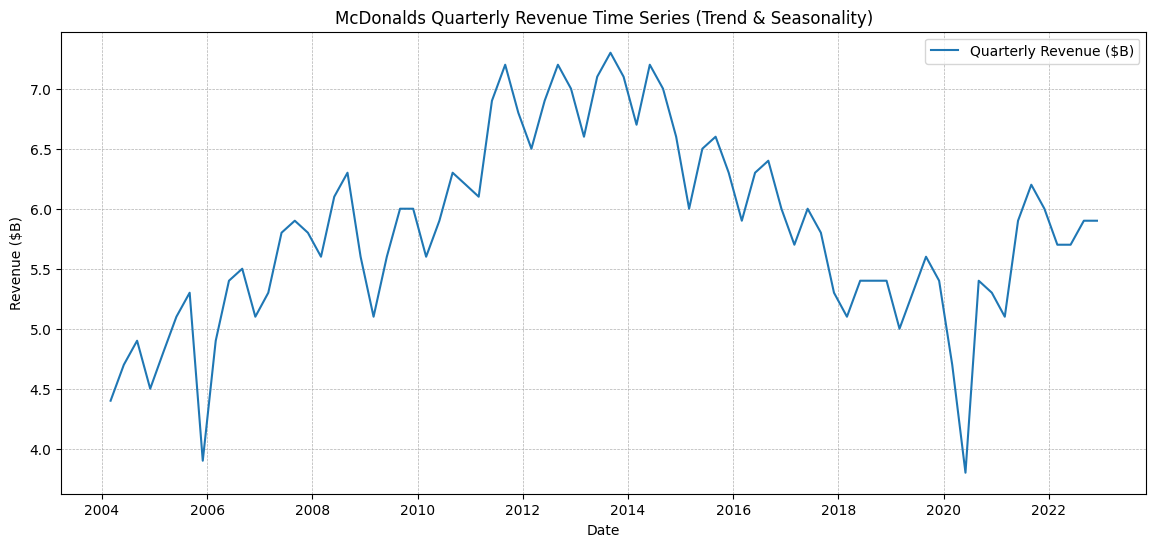

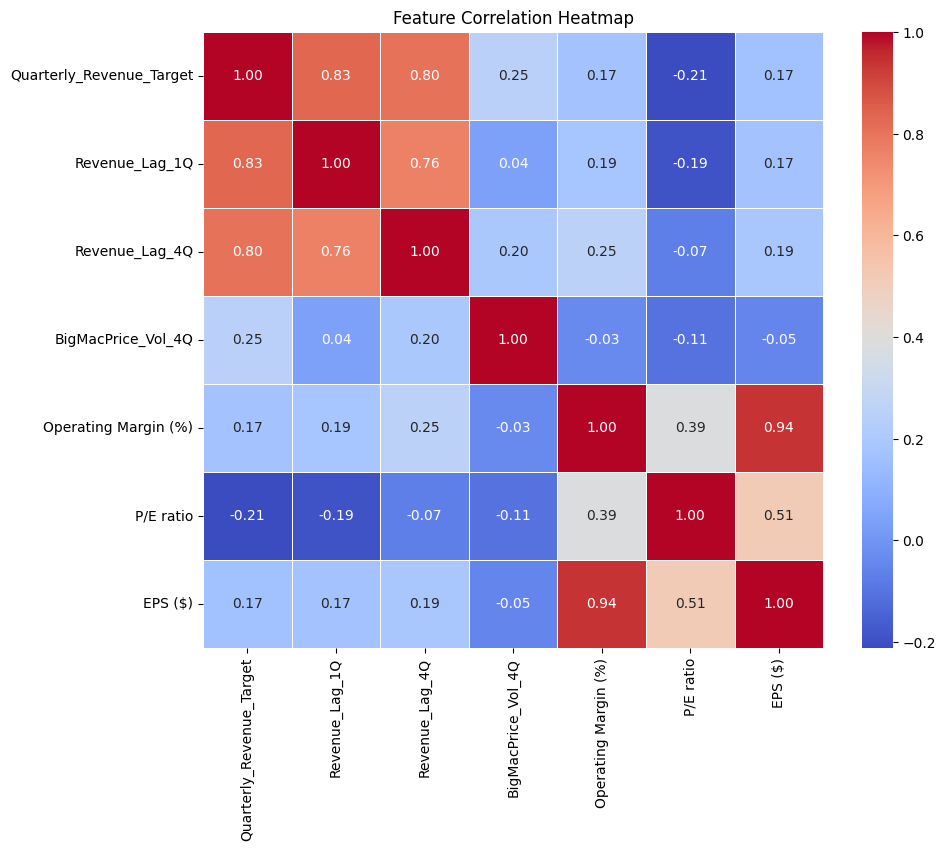

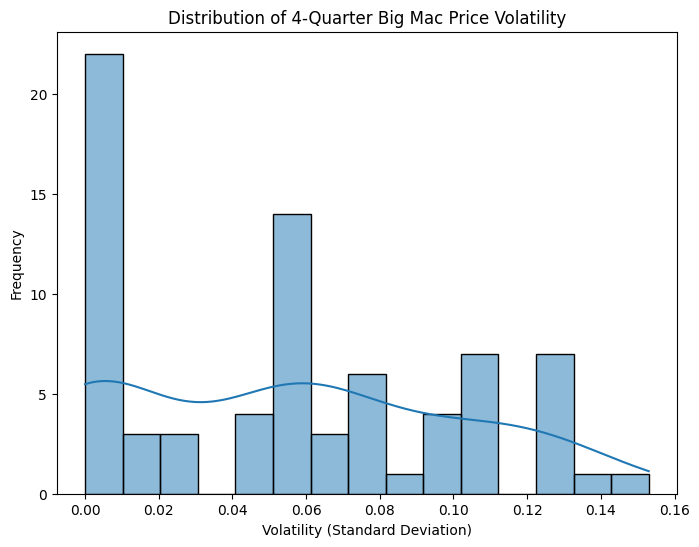

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Quarterly_Revenue_Target', data=df_final, label='Quarterly Revenue ($B)')
plt.title('McDonalds Quarterly Revenue Time Series (Trend & Seasonality)')
plt.xlabel('Date')
plt.ylabel('Revenue ($B)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

corr_cols = ['Quarterly_Revenue_Target', 'Revenue_Lag_1Q', 'Revenue_Lag_4Q', 'BigMacPrice_Vol_4Q', 'Operating Margin (%)', 'P/E ratio', 'EPS ($)']

plt.figure(figsize=(10, 8))
corr_matrix = df_final[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_final['BigMacPrice_Vol_4Q'], kde=True, bins=15)
plt.title('Distribution of 4-Quarter Big Mac Price Volatility')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
file_name_original = "/content/mcdonalds_financial_analysis.csv"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

try:
    df = pd.read_csv(file_name_original)
except FileNotFoundError:
    print(f"Error: The original file '{file_name_original}' was not found.")
    exit()

def clean_financial_string(series):
    return series.astype(str).str.replace('$', '', regex=False).str.replace('B', '', regex=False).str.strip().replace({'nan': np.nan, 'NA': np.nan}).astype(float)

cols_to_clean = ['Q1 ($B)', 'Q2 ($B)', 'Q3 ($B)', 'Q4 ($B)']
for col in cols_to_clean:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = clean_financial_string(df[col])

quarterly_cols = ['Q1 ($B)', 'Q2 ($B)', 'Q3 ($B)', 'Q4 ($B)']
id_vars = [col for col in df.columns if col not in quarterly_cols]
df_long = pd.melt(df, id_vars=id_vars, value_vars=quarterly_cols, var_name='Quarter_Str', value_name='Quarterly_Revenue_Target')
df_long['Quarter'] = df_long['Quarter_Str'].str.replace(r'[^\d]', '', regex=True).astype(int)
df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + (df_long['Quarter'] * 3).astype(str) + '-01')
df_ts = df_long.sort_values(by='Date').reset_index(drop=True).set_index('Date')
df_ts = df_ts.dropna(subset=['Quarterly_Revenue_Target'])

df_ts['Revenue_Lag_1Q'] = df_ts['Quarterly_Revenue_Target'].shift(1)
df_ts['Revenue_Lag_4Q'] = df_ts['Quarterly_Revenue_Target'].shift(4)
df_ts['BigMacPrice_Vol_4Q'] = df_ts['avg_dollar_price'].rolling(window=4).std()
df_ts['EPS_Rolling_Avg_4Q'] = df_ts['EPS ($)'].rolling(window=4).mean()

df_final = df_ts.dropna().reset_index()

y = df_final['Quarterly_Revenue_Target']
features = [
    'Revenue_Lag_1Q', 'Revenue_Lag_4Q',
    'BigMacPrice_Vol_4Q', 'EPS_Rolling_Avg_4Q', 'avg_dollar_price',
    'Quarter',
    'Operating Margin (%)', 'P/E ratio', 'Total debt ($B)', 'Cash on Hand ($B)'
]
X = df_final[features]

TEST_SIZE = 4
X_train_val, X_test = X.iloc[:-TEST_SIZE], X.iloc[-TEST_SIZE:]
y_train_val, y_test = y.iloc[:-TEST_SIZE], y.iloc[-TEST_SIZE:]

print(f"Total Observations: {len(X)}")
print(f"Training/Validation Set Size: {len(X_train_val)}")
print(f"Test Set Size: {len(X_test)}")

gbr_model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42
)
gbr_model.fit(X_train_val, y_train_val)
y_pred = gbr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\n--- Final Hold-out Test Set Evaluation ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} ($B)")
print(f"Mean Absolute Error (MAE): {mae:.4f} ($B)")

n_splits = 4
tscv = TimeSeriesSplit(n_splits=n_splits)
cv_scores = []
print("\n--- Time-Series Cross-Validation (TSCV) Scores ---")

for fold, (train_index, val_index) in enumerate(tscv.split(X_train_val)):
    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    model_cv = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
    model_cv.fit(X_train_fold, y_train_fold)
    y_val_pred = model_cv.predict(X_val_fold)
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    cv_scores.append(rmse_fold)
    print(f"Fold {fold+1} Validation RMSE: {rmse_fold:.4f}")

print(f"\nAverage Cross-Validation RMSE: {np.mean(cv_scores):.4f} ($B)")

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': gbr_model.feature_importances_}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance from Trained GBR Model:")
print(importance_df.to_markdown(index=False))

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs. Predicted (Test Set):")
print(results_df.to_markdown(index=True))

Total Observations: 76
Training/Validation Set Size: 72
Test Set Size: 4

--- Final Hold-out Test Set Evaluation ---
Root Mean Squared Error (RMSE): 0.2779 ($B)
Mean Absolute Error (MAE): 0.2028 ($B)

--- Time-Series Cross-Validation (TSCV) Scores ---
Fold 1 Validation RMSE: 0.4644
Fold 2 Validation RMSE: 0.4067
Fold 3 Validation RMSE: 0.8775
Fold 4 Validation RMSE: 0.5596

Average Cross-Validation RMSE: 0.5771 ($B)

Feature Importance from Trained GBR Model:
| Feature              |   Importance |
|:---------------------|-------------:|
| Revenue_Lag_1Q       |  0.660245    |
| Revenue_Lag_4Q       |  0.137394    |
| EPS_Rolling_Avg_4Q   |  0.0676713   |
| BigMacPrice_Vol_4Q   |  0.0363185   |
| Quarter              |  0.0350711   |
| P/E ratio            |  0.0306566   |
| avg_dollar_price     |  0.0161847   |
| Operating Margin (%) |  0.00841351  |
| Cash on Hand ($B)    |  0.00725622  |
| Total debt ($B)      |  0.000788971 |

Actual vs. Predicted (Test Set):
|    |   Actual |   Pr

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

tscv = TimeSeriesSplit(n_splits=4)

gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

print("Starting Grid Search Hyperparameter Tuning...")
grid_search.fit(X_train_val, y_train_val)

best_params = grid_search.best_params_
best_mse = -grid_search.best_score_
best_rmse = np.sqrt(best_mse)

print("\n--- Hyperparameter Tuning Results ---")
print(f"Best Parameters Found: {best_params}")
print(f"Best Historical Cross-Validation RMSE: {best_rmse:.4f} ($B)")

best_gbr_model = grid_search.best_estimator_

Starting Grid Search Hyperparameter Tuning...
Fitting 4 folds for each of 27 candidates, totalling 108 fits

--- Hyperparameter Tuning Results ---
Best Parameters Found: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Historical Cross-Validation RMSE: 0.6050 ($B)


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

file_name_original = "mcdonalds_financial_analysis.csv"

try:
    df = pd.read_csv(file_name_original)
except FileNotFoundError:
    print(f"Error: The original file '{file_name_original}' was not found.")
    exit()

def clean_financial_string(series):
    return series.astype(str).str.replace('$', '', regex=False).str.replace('B', '', regex=False).str.strip().replace({'nan': np.nan, 'NA': np.nan}).astype(float)

cols_to_clean = ['Q1 ($B)', 'Q2 ($B)', 'Q3 ($B)', 'Q4 ($B)']
for col in cols_to_clean:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = clean_financial_string(df[col])

quarterly_cols = ['Q1 ($B)', 'Q2 ($B)', 'Q3 ($B)', 'Q4 ($B)']
id_vars = [col for col in df.columns if col not in quarterly_cols]
df_long = pd.melt(df, id_vars=id_vars, value_vars=quarterly_cols, var_name='Quarter_Str', value_name='Quarterly_Revenue_Target')
df_long['Quarter'] = df_long['Quarter_Str'].str.replace(r'[^\d]', '', regex=True).astype(int)
df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + (df_long['Quarter'] * 3).astype(str) + '-01')
df_ts = df_long.sort_values(by='Date').reset_index(drop=True).set_index('Date')
df_ts = df_ts.dropna(subset=['Quarterly_Revenue_Target'])

y_ts = df_ts['Quarterly_Revenue_Target']
TEST_SIZE = 4
y_train = y_ts.iloc[:-TEST_SIZE]
y_test = y_ts.iloc[-TEST_SIZE:]

order = (1, 1, 1)
seasonal_order = (0, 1, 1, 4)

print(f"Fitting SARIMA{order}x{seasonal_order} on {len(y_train)} observations...")
sarima_model = SARIMAX(
    y_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

start_index = len(y_train)
end_index = len(y_train) + len(y_test) - 1

sarima_pred = sarima_model.predict(start=start_index, end=end_index, dynamic=False)

sarima_rmse = np.sqrt(mean_squared_error(y_test, sarima_pred))
sarima_mae = np.mean(np.abs(y_test - sarima_pred))

print("\n--- SARIMA Benchmark Model Evaluation (Out-of-Sample) ---")
print(f"SARIMA Root Mean Squared Error (RMSE): {sarima_rmse:.4f} ($B)")
print(f"SARIMA Mean Absolute Error (MAE): {sarima_mae:.4f} ($B)")
print("\nSARIMA Model Summary (Optional, for detailed analysis):")
print(sarima_model.summary())

Fitting SARIMA(1, 1, 1)x(0, 1, 1, 4) on 76 observations...

--- SARIMA Benchmark Model Evaluation (Out-of-Sample) ---
SARIMA Root Mean Squared Error (RMSE): 0.1870 ($B)
SARIMA Mean Absolute Error (MAE): 0.1635 ($B)

SARIMA Model Summary (Optional, for detailed analysis):
                                     SARIMAX Results                                     
Dep. Variable:          Quarterly_Revenue_Target   No. Observations:                   76
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 -28.272
Date:                           Tue, 09 Dec 2025   AIC                             64.544
Time:                                   06:57:07   BIC                             73.242
Sample:                               03-01-2003   HQIC                            67.976
                                    - 12-01-2021                                         
Covariance Type:                             opg                                         
        

In [ ]:
SARIMA_RMSE = 0.1870
GBR_RMSE = 0.2779

percentage_change = ((GBR_RMSE - SARIMA_RMSE) / SARIMA_RMSE) * 100

print(f"SARIMA Benchmark RMSE: {SARIMA_RMSE:.4f} ($B)")
print(f"GBR Model RMSE: {GBR_RMSE:.4f} ($B)")
print(f"\nFinal Metric: The GBR model's RMSE was {percentage_change:.2f}% higher than the SARIMA benchmark.")

SARIMA Benchmark RMSE: 0.1870 ($B)
GBR Model RMSE: 0.2779 ($B)

Final Metric: The GBR model's RMSE was 48.61% higher than the SARIMA benchmark.
